<a href="https://colab.research.google.com/github/wiiiiish/2022-machine_learning/blob/main/%08%EB%AA%A8%EB%8D%B8_%EC%A0%95%ED%99%95%EB%8F%84_%ED%99%95%EC%9D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

drive  sample_data


In [ ]:
%cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%cd 2022-05-13\ 모델\ 생성\ 작업

/content/drive/MyDrive/Colab Notebooks/2022-05-13 모델 생성 작업


In [ ]:
%cd ../2022-05-12\ lstm

/content/drive/MyDrive/Colab Notebooks/2022-05-12 lstm


In [ ]:
%cd ../2022-05-11\ 선형회귀모델

/content/drive/MyDrive/Colab Notebooks/2022-05-11 선형회귀모델


In [ ]:
from keras.models import load_model
model_lstm = load_model('./lstm_model_v2.h5')
model_rnn = load_model('./rnn_model_v2.h5')

In [ ]:
import pickle
with open('LinearRegression_model.pickle', 'rb') as f:
    model_linear = pickle.load(f)

In [ ]:
!unzip ./data/data.zip -d ./data

Archive:  ./data/data.zip
replace ./data/y_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/y_train.csv      
replace ./data/y_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/y_test.csv       
replace ./data/X_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/X_test.csv       
replace ./data/X_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ./data/X_train.csv      


In [ ]:
test_X = pd.read_csv('./data/new_X_test.csv', encoding='utf-8')
test_y = pd.read_csv('./data/new_y_test.csv', encoding='utf-8')
train_X = pd.read_csv('./data/new_X_train.csv', encoding='utf-8')
train_y = pd.read_csv('./data/new_y_train.csv', encoding='utf-8')

In [ ]:
test_X = test_X.drop([test_X.columns[0], test_X.columns[1]], axis=1)
test_X

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,18.617831,0.516401,0.809384,98.959057,0.0,10.059022,293.356097,20.498976,0.0,0.0
1,18.651926,0.569257,0.805434,99.057296,0.0,9.966155,315.298922,20.488344,0.0,0.0
2,18.662691,0.494146,0.792034,99.099421,0.0,9.988373,365.335158,20.460186,0.0,0.0
3,18.659062,0.543059,0.806897,99.064737,0.0,9.969104,318.862476,20.481378,0.0,0.0
4,18.625796,0.562925,0.807858,98.908900,0.0,10.052210,326.792033,20.459964,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17276,18.283050,0.000000,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161,0.0,0.0
17277,18.129412,0.000000,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846,0.0,0.0
17278,18.382404,0.000000,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558,0.0,0.0
17279,18.330052,0.000000,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875,0.0,0.0


In [ ]:
test_y = test_y.drop(test_y.columns[0], axis=1)
test_y

,aod
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [ ]:
X_test = np.array(test_X)
y_test = np.array(test_y)

In [ ]:
model_linear.score(X_test,y_test)

0.9356230835419342

In [ ]:
X = test_X.loc[:, 'temperature':]
X

,temperature,precipitation,wind_speed,humidity,radiation,total_cloudiness,visibility,ground_temp,now_aod,before_hour_aod
0,18.617831,0.516401,0.809384,98.959057,0.0,10.059022,293.356097,20.498976,0.0,0.0
1,18.651926,0.569257,0.805434,99.057296,0.0,9.966155,315.298922,20.488344,0.0,0.0
2,18.662691,0.494146,0.792034,99.099421,0.0,9.988373,365.335158,20.460186,0.0,0.0
3,18.659062,0.543059,0.806897,99.064737,0.0,9.969104,318.862476,20.481378,0.0,0.0
4,18.625796,0.562925,0.807858,98.908900,0.0,10.052210,326.792033,20.459964,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
17276,18.283050,0.000000,0.405887,99.085079,0.0,8.690979,1561.349615,19.431161,0.0,0.0
17277,18.129412,0.000000,0.174424,99.085969,0.0,7.803026,1589.808823,19.113846,0.0,0.0
17278,18.382404,0.000000,0.242054,99.037656,0.0,7.317212,1557.983555,19.318558,0.0,0.0
17279,18.330052,0.000000,0.169326,98.922077,0.0,8.032720,1511.005849,19.513875,0.0,0.0


In [ ]:
X = np.array(X)
X

array([[18.61783062,  0.51640084,  0.80938449, ..., 20.49897593,
         0.        ,  0.        ],
       [18.65192644,  0.56925657,  0.80543435, ..., 20.48834361,
         0.        ,  0.        ],
       [18.66269063,  0.4941459 ,  0.79203416, ..., 20.46018555,
         0.        ,  0.        ],
       ...,
       [18.38240386,  0.        ,  0.24205367, ..., 19.31855832,
         0.        ,  0.        ],
       [18.33005219,  0.        ,  0.16932553, ..., 19.51387543,
         0.        ,  0.        ],
       [18.43435631,  0.        ,  0.22073599, ..., 19.75290977,
         0.        ,  0.        ]])

In [ ]:
X.shape

(17281, 10)

In [ ]:
temp = []
for i in range(len(X)-360):
  for j in range(360):
    temp.append(X[i+j])
test_data = np.array(temp)
test_data.shape

(6091560, 10)

In [ ]:
X_test2 = test_data.reshape(16921,360,10)
X_test2.shape

(16921, 360, 10)

In [ ]:
y = test_y.iloc[360:, :]
y

,aod
360,0.0
361,0.0
362,0.0
363,0.0
364,0.0
...,...
17276,0.0
17277,0.0
17278,0.0
17279,0.0


In [ ]:
y_test2 = np.array(y)
print(y_test2.shape)
y_test2

(16921, 1)


array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [ ]:
rnn_res = model_rnn.predict(X_test2)
rnn_res

array([[-0.13218129],
       [ 0.7222249 ],
       [-0.41272905],
       ...,
       [ 0.15857409],
       [ 0.1738909 ],
       [ 0.12007071]], dtype=float32)

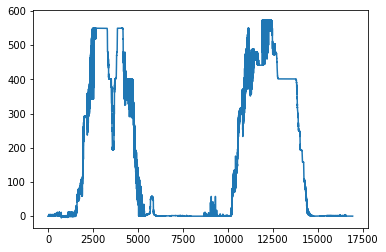

In [ ]:
plt.plot(rnn_res)

In [ ]:
lstm_res = model_lstm.predict(X_test2)
lstm_res

array([[ 2.3450196],
       [11.870317 ],
       [ 5.8430696],
       ...,
       [ 1.733438 ],
       [ 1.7853389],
       [ 1.6157598]], dtype=float32)

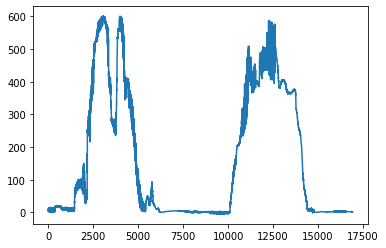

In [ ]:
plt.plot(lstm_res)

In [ ]:
linear_res = model_linear.predict(X_test)
linear_res

array([[21.10267036],
       [21.36060029],
       [21.67240469],
       ...,
       [27.94141009],
       [27.96125125],
       [30.24105047]])

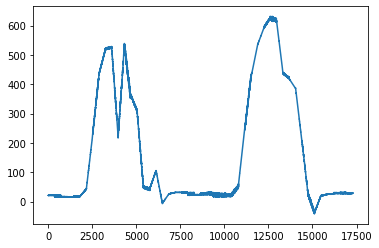

In [ ]:
plt.plot(linear_res)

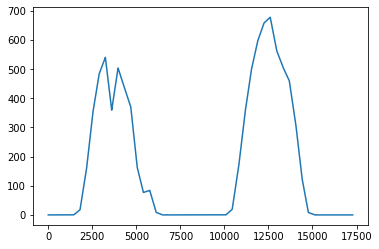

In [ ]:
plt.plot(y_test)

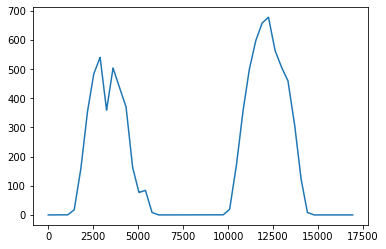

In [ ]:
plt.plot(y_test2)

In [ ]:
score_lstm = model_lstm.evaluate(X_test2, y_test2)
score_rnn = model_rnn.evaluate(X_test2, y_test2)

print(f"lstm : {score_lstm}")
print(f"rnn : {score_rnn}")

529/529 [==============================] - 12s 23ms/step - loss: 41.2903 - mae: 41.2903
lstm : [47.991207122802734, 47.991207122802734]
rnn : [41.290260314941406, 41.290260314941406]


In [43]:
#!pip install sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [ ]:
# RNN
mean_squared_error(y_test2, rnn_res)

4729.32611232181

In [ ]:
mean_squared_error(y_test2, lstm_res)

6521.371769946501

In [ ]:
mean_squared_error(y_test, linear_res)

3218.8973513370543